# Data Challenge2:
Bigger focus this time on exploring the data for interesting trends.

In this data challenge we’re going to explore a dataset describing the players who played in the 2012-13 European football (soccer) professional leagues. Data about the players’ ages, heights, weights, position, skintone rating, and more were included. Focus on exploring the data to find interesting trends, with an overarching goal of answering the following question: 
## Are soccer referees more likely to give red cards to dark skin toned players than light skin toned players?



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import roc_curve, auc,classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [3]:
df=pd.read_csv('redcard.csv', index_col=False)
#df = pd.DataFrame.from_csv('referral.csv')
df.shape



(146028, 28)

In [4]:
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146028 entries, 0 to 146027
Data columns (total 28 columns):
playerShort      146028 non-null object
player           146028 non-null object
club             146028 non-null object
leagueCountry    146028 non-null object
birthday         146028 non-null object
height           145765 non-null float64
weight           143785 non-null float64
position         128302 non-null object
games            146028 non-null int64
victories        146028 non-null int64
ties             146028 non-null int64
defeats          146028 non-null int64
goals            146028 non-null int64
yellowCards      146028 non-null int64
yellowReds       146028 non-null int64
redCards         146028 non-null int64
photoID          124621 non-null object
rater1           124621 non-null float64
rater2           124621 non-null float64
refNum           146028 non-null int64
refCountry       146028 non-null int64
Alpha_3          146027 non-null object
meanIAT        

In [6]:
df[['yellowCards','yellowReds','redCards','rater1','rater2']].describe()

,yellowCards,yellowReds,redCards,rater1,rater2
count,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000
mean,0.385364,0.011381,0.012559,0.264255,0.302862
std,0.795333,0.107931,0.112889,0.295382,0.293020
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.250000,0.250000
75%,1.000000,0.000000,0.000000,0.250000,0.500000
max,14.000000,3.000000,2.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

playerShort          0
player               0
club                 0
leagueCountry        0
birthday             0
height             263
weight            2243
position         17726
games                0
victories            0
ties                 0
defeats              0
goals                0
yellowCards          0
yellowReds           0
redCards             0
photoID          21407
rater1           21407
rater2           21407
refNum               0
refCountry           0
Alpha_3              1
meanIAT            163
nIAT               163
seIAT              163
meanExp            163
nExp               163
seExp              163
dtype: int64

In [23]:
#Let's see if all the missing values in columns photid, rater1 and rater2 are the same

print sum(df['photoID'][df['photoID'].isnull()].index==df['rater1'][df['rater1'].isnull()].index)
print sum(df['rater2'][df['rater2'].isnull()].index==df['rater1'][df['rater1'].isnull()].index)



#To deal with missing values, I will first plot the distribution of the variables to 
# identify the type of missing values (trunctaed, censored or random)
#The former proves that the missing values correspond to missing information in photoID.
#Around 15% of the photoID data is missing. 
#I will look at the set of players with missing values


21407
21407


In [8]:
df.shape

(146028, 28)

In [9]:
df[['yellowCards','yellowReds','redCards','rater1','rater2']].dropna(inplace=True)
df.shape

/Users/elahe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(146028, 28)

In [10]:
df.groupby('redCards')[['yellowCards','yellowReds','rater1','rater2']].mean()

,yellowCards,yellowReds,rater1,rater2
redCards,,,,
0,0.378341,0.011212,0.263967,0.302622
1,0.936099,0.024103,0.286989,0.321869
2,1.600000,0.080000,0.281250,0.312500


In [11]:
df['rater1'].unique()

array([ 0.25,  0.75,   nan,  0.  ,  1.  ,  0.5 ])

In [12]:
df['rater2'].unique()

array([ 0.5 ,  0.75,   nan,  0.  ,  0.25,  1.  ])

In [13]:
df.groupby('rater1')[['yellowCards','yellowReds','redCards','rater2']].mean()

,yellowCards,yellowReds,redCards,rater2
rater1,,,,
0.00,0.387652,0.011191,0.011391,0.081443
0.25,0.432575,0.013201,0.013613,0.257876
0.50,0.373502,0.011244,0.012946,0.500795
0.75,0.365961,0.011262,0.013683,0.806836
1.00,0.371552,0.013547,0.015025,0.983067


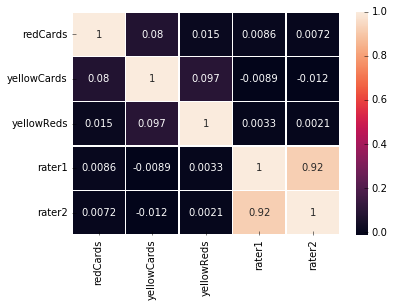

In [14]:
sns.heatmap(df[['redCards','yellowCards','yellowReds','rater1','rater2']].corr(),annot=True ,linewidths=.5)
plt.show()
#sns.heatmap(

In [15]:
df['redCards'].sum()

1834L

In [16]:
df.groupby(['redCards']).redCards.count()

redCards
0    144219
1      1784
2        25
Name: redCards, dtype: int64

# Feature Engineering

In [17]:
df['totalRedCards'] = df['redCards'] + df['yellowReds']
df['meanRate'] = df[['rater1','rater2']].mean(axis=1)

In [21]:
#### Datetime variable, transforming birthday to age

df['datetime']=pd.to_datetime(df['birthday'],  errors='ignore')
#The data is from 2012-13 European cup, so I will substract from this date the birthday of the players
#and compute the age

df['age']=[round(((pd.to_datetime('2013-01')-date).days +(pd.to_datetime('2013-01')-date).seconds/86400)/365.2425,0)  for date in df['datetime']]

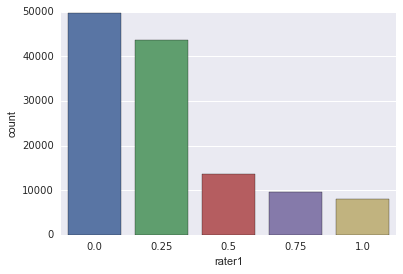

In [18]:
sns.set(style="darkgrid")
ax = sns.countplot(x="rater1",data=df)
plt.show()

In [19]:
df['totalRedCards'].value_counts()

0    142627
1      3312
2        83
3         6
Name: totalRedCards, dtype: int64

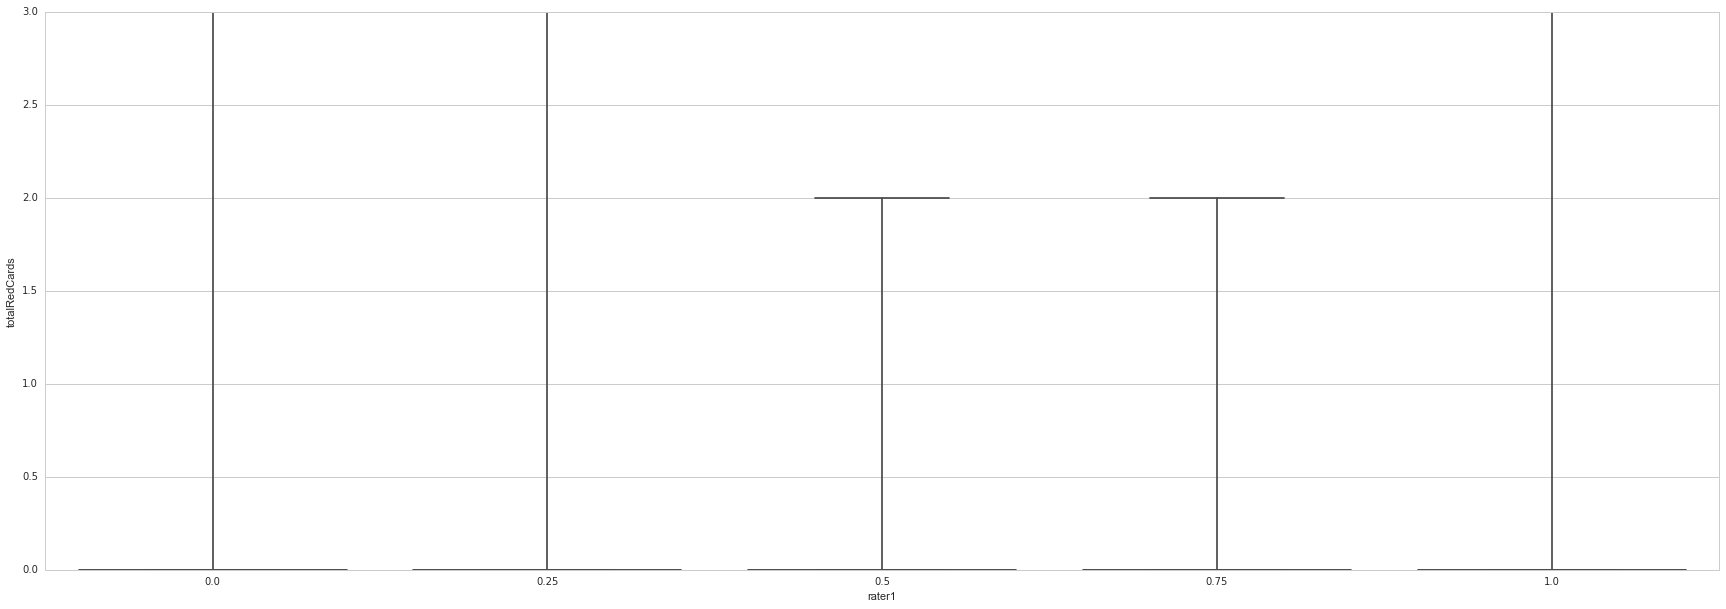

In [108]:
f, ax = plt.subplots(figsize=(30,10))
sns.set_style("whitegrid")
ax = sns.boxplot(x="rater1", y='totalRedCards', data=df)
plt.show()

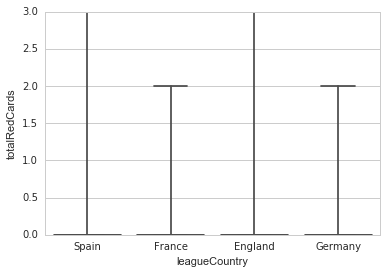

In [107]:
f, ax = plt.subplots(figsize=(30,10))
sns.countplot(x='club', data=df[df.redCards>0])
sns.barplot(x='club', y='redCards', data=df)

plt.xticks(rotation=-45, ha='left')

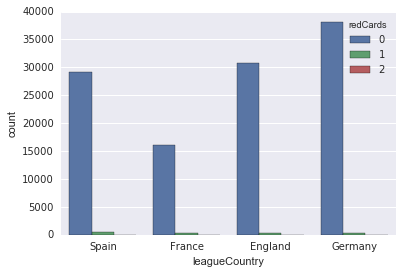

In [104]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="leagueCountry", y='rater1', data=df)
plt.show()

### 2053 Players across 118 Clubs, 4 Countries  x  3147 Referees

1. Redcards per country
2. Redcards per club
3. Redcards per position
4. Top Players/ref according to the redcards

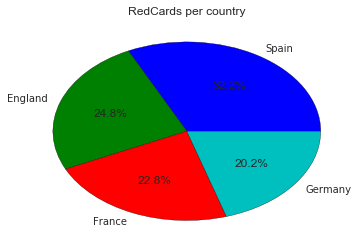

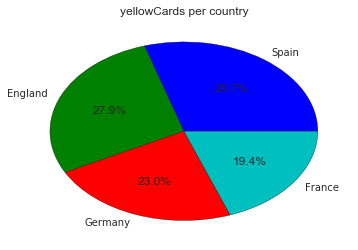

In [29]:
cntry = df.groupby('leagueCountry').agg({'totalRedCards': 'sum','yellowCards':'sum'}).reset_index()
cntry_red = cntry.sort_values(['totalRedCards'],ascending=False)
cntry_yel = cntry.sort_values(['yellowCards'],ascending=False)
plt.title('RedCards per country')
plt.pie(cntry_red['totalRedCards'],labels=cntry_red['leagueCountry'],autopct='%1.1f%%')
plt.show()

plt.title('yellowCards per country')
plt.pie(cntry_yel['yellowCards'],labels=cntry_yel['leagueCountry'],autopct='%1.1f%%')
plt.show()

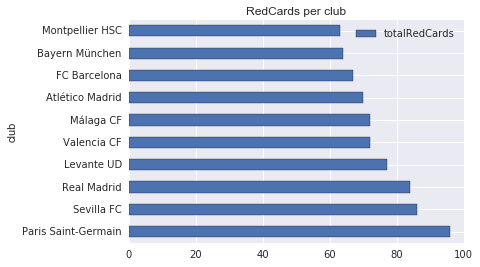

In [51]:
club = df.groupby('club').agg({'totalRedCards': 'sum','yellowCards':'sum'}).reset_index()
club= club.sort_values(['totalRedCards'],ascending=False)
club = club.nlargest(10, 'totalRedCards').reset_index()

#plt.plot(club['totalRedCards'],kind ='barh',labels=club['club'])
club.plot(kind ='barh',y='totalRedCards',x='club')
plt.title('RedCards per club')
plt.show()

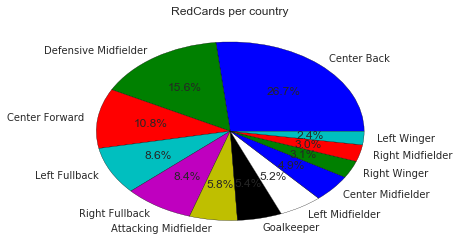

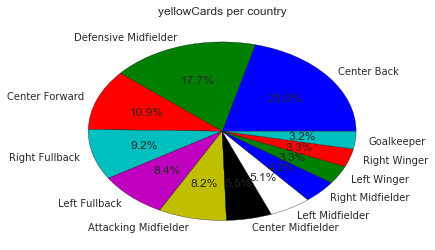

In [52]:
position = df.groupby('position').agg({'totalRedCards': 'sum','yellowCards':'sum'}).reset_index()
position_red = position.sort_values(['totalRedCards'],ascending=False)
position_yel = position.sort_values(['yellowCards'],ascending=False)
plt.title('RedCards per position')
plt.pie(position_red['totalRedCards'],labels=position_red['position'],autopct='%1.1f%%')
plt.show()

plt.title('yellowCards per position')
plt.pie(position_yel['yellowCards'],labels=position_yel['position'],autopct='%1.1f%%')
plt.show()

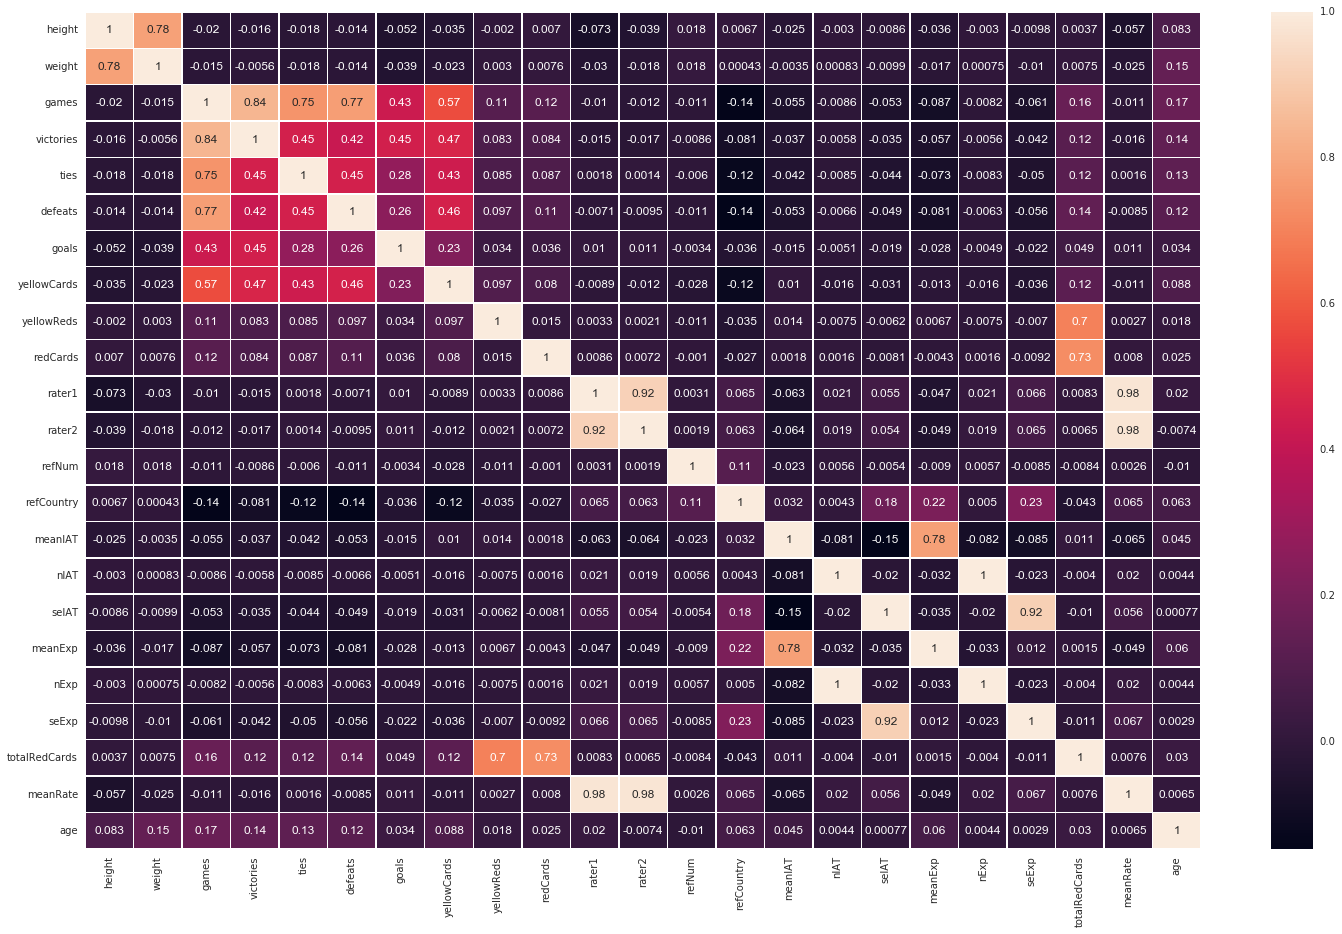

In [54]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 15

sns.heatmap(df.corr(), annot=True, linewidths=.5)
plt.show()

# Statistical Test

In [56]:
df['skin_tone']=df['meanRate'].transform(lambda x: 'Light' if x <=0.5 else 'Dark')
df_proportions=df.groupby('skin_tone').agg({'totalRedCards':'sum','playerShort':'count'}).reset_index()
df_proportions

,skin_tone,playerShort,totalRedCards
0,Dark,41314,908
1,Light,104714,2588


In [57]:
# 2-sample test for equality of proportions with continuity correction

from scipy import stats

flat_proportions=np.array([[18136,465],[97321,2432]])

print stats.chi2_contingency(flat_proportions)

# Another way
from statsmodels.stats.proportion import proportions_ztest
count = np.array([465, 2432])
nobs = np.array([18136, 97321])
stat, pval = proportions_ztest(count, nobs)
print pval

(0.22588006706391095, 0.63459566815398794, 1, array([[ 18145.69559964,    455.30440036],
       [ 97311.30440036,   2441.69559964]]))
0.607281526205


In [ ]:
\\\\\\